In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm



In [0]:

def train_pred_svm(X, Y, kernel='linear', reg_param=0,kernel_param=1,num_iter_gd=100):
    clf = svm.SVC(kernel=kernel,C = reg_param,degree = kernel_param,gamma = kernel_param)
    clf.fit(X,Y)
    return clf
  
def test_pred_svm(x_test,clf):
    preds = clf.predict(x_test)
    return preds


def zero_one_error(preds,y_test):
    count = 0
    for i in range(len(preds)):
        if(preds[i] == y_test[i]):
            count+=1
    return 1-count/len(preds) 
  


In [14]:
l=["dataset_A.npz","dataset_B.npz","dataset_C.npz","dataset_D.npz"]

X = []
Y = []
X_test = []
Y_test = []
X_train = []
X_valid = []
Y_train = []
Y_valid = []

for i in range(len(l)):
    train=np.load(l[i])
    X.append(train[train.files[0]])
    Y.append(train[train.files[1]])
    X_test.append(train[train.files[2]])
    Y_test.append(train[train.files[3]])
    indices = np.random.permutation(len(X[i]))
    Valid_set_size = int(len(X[i]) * 0.2)
    ind = indices[:Valid_set_size]
    ind1 =indices[Valid_set_size:]
    X_train.append(X[i][ind1])
    X_valid.append(X[i][ind])
    Y_train.append(Y[i][ind1])
    Y_valid.append(Y[i][ind])


mins = []


pos = 0
kernel_param=[1,2,3,5]
for i in range(3):
    min = 1
    for val in kernel_param:
        a=train_pred_svm(X_train[i], Y_train[i], kernel='poly', reg_param=1,kernel_param=val, num_iter_gd=100)
        b=test_pred_svm(X_valid[i],a)
        c=test_pred_svm(X_test[i],a)
        print("for kernel_param = {},".format(val),"Zero one error valid is {}".format(zero_one_error(b,Y_valid[i])))
        print("for kernel_param = {},".format(val),"Zero one error test is {}".format(zero_one_error(c,Y_test[i])))
        if(zero_one_error(b,Y_valid[i]) < min):
          min = zero_one_error(b,Y_valid[i])
          pos = val
    print("for kernel param :{},Minimum error is {} ".format(pos,min))
    mins.append(pos)  

# Dataset D takes extremely long to run for kernel parameters > 2. So stopping with 2 for it



posi = 0
kernps = [1,2]
for i in range(3,4):
  mini = 1
  for val in kernps:
    a=train_pred_svm(X_train[i], Y_train[i], kernel='poly', reg_param=1,kernel_param=val, num_iter_gd=100)
    b=test_pred_svm(X_valid[i],a)
    c=test_pred_svm(X_test[i],a)
    print("for kernel_param = {},".format(val),"Zero one error valid is {}".format(zero_one_error(b,Y_valid[i])))
    print("for kernel_param = {},".format(val),"Zero one error test is {}".format(zero_one_error(c,Y_test[i])))
    if(zero_one_error(b,Y_valid[i]) < mini):
      mini = zero_one_error(b,Y_valid[i])
      posi = val
  print("for kernel param :{},Minimum error is {} ".format(posi,mini))
  mins.append(posi)


minsr = []


pos = 0
kernel_param=[0.001,0.01,0.1,1,10,100,1000]
for i in range(4):
  min = 1
  for val in kernel_param:
        a=train_pred_svm(X_train[i], Y_train[i], kernel='rbf', reg_param=1,kernel_param=val, num_iter_gd=100)
        b=test_pred_svm(X_valid[i],a)
        c=test_pred_svm(X_test[i],a)
        print("for kernel_param = {},".format(val),"Zero one error valid is {}".format(zero_one_error(b,Y_valid[i])))
        print("for kernel_param = {},".format(val),"Zero one error test is {}".format(zero_one_error(c,Y_test[i])))
        if(zero_one_error(b,Y_valid[i]) < min):
          min = zero_one_error(b,Y_valid[i])
          pos = val
  print("for kernel param :{}, Minimum error is {} ".format(pos,min))
  minsr.append(pos) 


  ## Regularisation
regs=[]
reg_params = [0.0001,0.001,0.01,0.1,1,10,100]


min1 = 1
min2 = 1
min3 = 1
min4 = 1
min5 = 1
min6 = 1
min7 = 1
min8 = 1
min9 = 1
min10 = 1
min11 = 1
min12 = 1
reg = 0
#poly
#kernel_param=[1,3,5]
for i in range(4):
  if(i == 0):
    print("A")
    print("Linear")
    for val in reg_params:
      Alin=train_pred_svm(X_train[i], Y_train[i], kernel='poly', reg_param=val,kernel_param=1, num_iter_gd=100)
      a1 = test_pred_svm(X_valid[i],Alin)
      a2 = test_pred_svm(X_train[i],Alin)
      a3 = test_pred_svm(X_test[i],Alin)
      z = zero_one_error(a1,Y_valid[i])
      z1 = zero_one_error(a2,Y_train[i])
      z2 = zero_one_error(a3,Y_test[i])
      print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))
      if (z < min1):
        min1 = z
        reg = val
    print("for reg param :{}, Minimum error is {} ".format(reg,min1))
    regs.append(reg) 
    print("Poly")
    for val in reg_params:
      Apoly=train_pred_svm(X_train[i], Y_train[i], kernel='poly', reg_param=val,kernel_param=mins[i], num_iter_gd=100)
      a1 = test_pred_svm(X_valid[i],Apoly)
      a2 = test_pred_svm(X_train[i],Apoly)
      a3 = test_pred_svm(X_test[i],Apoly)
      z = zero_one_error(a1,Y_valid[i])
      z1 = zero_one_error(a2,Y_train[i])
      z2 = zero_one_error(a3,Y_test[i])
      print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

      if (z < min2):
        min2 = z
        reg = val
    print("for reg param :{}, Minimum error is {} ".format(reg,min2))
    regs.append(reg)
    print("Rbf")  
    for val in reg_params:
      Arbf=train_pred_svm(X_train[i], Y_train[i], kernel='rbf', reg_param=val,kernel_param=minsr[i], num_iter_gd=100)
      a1 = test_pred_svm(X_valid[i],Arbf)
      a2 = test_pred_svm(X_train[i],Arbf)
      a3 = test_pred_svm(X_test[i],Arbf)
      z = zero_one_error(a1,Y_valid[i])
      z1 = zero_one_error(a2,Y_train[i])
      z2 = zero_one_error(a3,Y_test[i])
      print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

      if (z < min3):
        min3 = z
        reg = val
    print("for reg param :{}, Minimum error is {} ".format(reg,min3))
    regs.append(reg)
      #B  
  elif(i == 1):  
      print("B")
      print("Linear")
      for val in reg_params:  
        Blin=train_pred_svm(X_train[i], Y_train[i], kernel='poly', reg_param=val,kernel_param=1, num_iter_gd=100)
        a1 = test_pred_svm(X_valid[i],Blin)
        a2 = test_pred_svm(X_train[i],Blin)
        a3 = test_pred_svm(X_test[i],Blin)
        z = zero_one_error(a1,Y_valid[i])
        z1 = zero_one_error(a2,Y_train[i])
        z2 = zero_one_error(a3,Y_test[i])
        print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

        if (z < min4):
          min4 = z
          reg = val
      print("for reg param :{}, Minimum error is {} ".format(reg,min4))
      regs.append(reg)
      print("Poly")
      for val in reg_params:  
        Bpoly=train_pred_svm(X_train[i], Y_train[i], kernel='poly', reg_param=val,kernel_param=mins[i], num_iter_gd=100)
        a1 = test_pred_svm(X_valid[i],Bpoly)
        a2 = test_pred_svm(X_train[i],Bpoly)
        a3 = test_pred_svm(X_test[i],Bpoly)
        z = zero_one_error(a1,Y_valid[i])
        z1 = zero_one_error(a2,Y_train[i])
        z2 = zero_one_error(a3,Y_test[i])
        print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

        if (z < min5):
          min5 = z
          reg = val
      print("for reg param :{}, Minimum error is {} ".format(reg,min5))
      regs.append(reg)
      print("Rbf") 
      for val in reg_params:  
        Brbf=train_pred_svm(X_train[i], Y_train[i], kernel='rbf', reg_param=val,kernel_param=minsr[i], num_iter_gd=100)
        a1 = test_pred_svm(X_valid[i],Brbf)
        a2 = test_pred_svm(X_train[i],Brbf)
        a3 = test_pred_svm(X_test[i],Brbf)
        z = zero_one_error(a1,Y_valid[i])
        z1 = zero_one_error(a2,Y_train[i])
        z2 = zero_one_error(a3,Y_test[i])
        print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

        if (z < min6):
          min6 = z
          reg = val
      print("for reg param :{}, Minimum error is {} ".format(reg,min6))
      regs.append(reg)
      #C
  elif(i == 2): 
      print("C") 
      print("Linear")
      for val in reg_params:  
        Clin=train_pred_svm(X_train[i], Y_train[i], kernel='poly', reg_param=val,kernel_param=1, num_iter_gd=100)
        a1 = test_pred_svm(X_valid[i],Clin)
        a2 = test_pred_svm(X_train[i],Clin)
        a3 = test_pred_svm(X_test[i],Clin)
        z = zero_one_error(a1,Y_valid[i])
        z1 = zero_one_error(a2,Y_train[i])
        z2 = zero_one_error(a3,Y_test[i])
        print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

        if (z < min7):
          min7 = z
          reg = val
      print("for reg param :{}, Minimum error is {} ".format(reg,min7))
      regs.append(reg)
      print("Poly")
      for val in reg_params:  
        Cpoly=train_pred_svm(X_train[i], Y_train[i], kernel='poly', reg_param=val,kernel_param=mins[i], num_iter_gd=100)
        a1 = test_pred_svm(X_valid[i],Cpoly)
        a2 = test_pred_svm(X_train[i],Cpoly)
        a3 = test_pred_svm(X_test[i],Cpoly)
        z = zero_one_error(a1,Y_valid[i])
        z1 = zero_one_error(a2,Y_train[i])
        z2 = zero_one_error(a3,Y_test[i])
        print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

        if (z < min8):
          min8 = z
          reg = val
      print("for reg param :{}, Minimum error is {} ".format(reg,min8))
      regs.append(reg)
      print("Rbf") 
      for val in reg_params:  
        Crbf=train_pred_svm(X_train[i], Y_train[i], kernel='rbf', reg_param=val,kernel_param=minsr[i], num_iter_gd=100)
        a1 = test_pred_svm(X_valid[i],Crbf)
        a2 = test_pred_svm(X_train[i],Crbf)
        a3 = test_pred_svm(X_test[i],Crbf)
        z = zero_one_error(a1,Y_valid[i])
        z1 = zero_one_error(a2,Y_train[i])
        z2 = zero_one_error(a3,Y_test[i])
        print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

        if (z < min9):
          min9 = z
          reg = val
      print("for reg param :{}, Minimum error is {} ".format(reg,min9))
      regs.append(reg)
  elif(i == 3): 
      print("D") 
      print("Linear")
      for val in reg_params:  
        Dlin=train_pred_svm(X_train[i], Y_train[i], kernel='poly', reg_param=val,kernel_param=1, num_iter_gd=100)
        a1 = test_pred_svm(X_valid[i],Dlin)
        a2 = test_pred_svm(X_train[i],Dlin)
        a3 = test_pred_svm(X_test[i],Dlin)
        z = zero_one_error(a1,Y_valid[i])
        z1 = zero_one_error(a2,Y_train[i])
        z2 = zero_one_error(a3,Y_test[i])
        print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

        if (z < min10):
          min10 = z
          reg = val
      print("for reg param :{}, Minimum error is {} ".format(reg,min10))
      regs.append(reg)
      print("Poly")
      for val in reg_params:  
        Dpoly=train_pred_svm(X_train[i], Y_train[i], kernel='poly', reg_param=val,kernel_param=mins[i], num_iter_gd=100)
        a1 = test_pred_svm(X_valid[i],Dpoly)
        a2 = test_pred_svm(X_train[i],Dpoly)
        a3 = test_pred_svm(X_test[i],Dpoly)
        z = zero_one_error(a1,Y_valid[i])
        z1 = zero_one_error(a2,Y_train[i])
        z2 = zero_one_error(a3,Y_test[i])
        print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

        if (z < min11):
          min11 = z
          reg = val
      print("for reg param :{}, Minimum error is {} ".format(reg,min11))
      regs.append(reg)
      print("Rbf") 
      for val in reg_params:  
        Drbf=train_pred_svm(X_train[i], Y_train[i], kernel='rbf', reg_param=val,kernel_param=minsr[i], num_iter_gd=100)
        a1 = test_pred_svm(X_valid[i],Drbf)
        a2 = test_pred_svm(X_train[i],Drbf)
        a3 = test_pred_svm(X_test[i],Drbf)
        z = zero_one_error(a1,Y_valid[i])
        z1 = zero_one_error(a2,Y_train[i])
        z2 = zero_one_error(a3,Y_test[i])
        print("for reg_param = {},".format(val),"Zero one error valid, is {}, train error is {}, test error is {}".format(z,z1,z2))

        if (z < min12):
          min12 = z
          reg = val
      print("for reg param :{}, Minimum error is {} ".format(reg,min12))
      regs.append(reg)





# Printing the kernel hyperparameters
kernel = ["poly","rbf"]
p = 0
q = 0
for set in l:
  for k in kernel:
    if(k == "poly"):
      print("for dataset :{}, kernel : {}".format(set,k),"best kernel parameter is {}".format(mins[p]))
      p += 1
    else:
      print("for dataset :{}, kernel : {}".format(set,k),"best kernel parameter is {}".format(minsr[q]))
      q += 1
 # Printing the best Regularization parameters

kernels = ["linear","poly","rbf"]
p = 0
q = 0
for set in l:
  for k in kernels:
      print("for dataset :{}, kernel : {}".format(set,k)," best Regularisation parameter is {}".format(regs[p]))
      p += 1
        


for kernel_param = 1, Zero one error valid is 0.1433333333333333
for kernel_param = 1, Zero one error test is 0.132
for kernel_param = 2, Zero one error valid is 0.21333333333333337
for kernel_param = 2, Zero one error test is 0.20999999999999996
for kernel_param = 3, Zero one error valid is 0.08333333333333337
for kernel_param = 3, Zero one error test is 0.07799999999999996
for kernel_param = 5, Zero one error valid is 0.08999999999999997
for kernel_param = 5, Zero one error test is 0.08399999999999996
for kernel param :3,Minimum error is 0.08333333333333337 
for kernel_param = 1, Zero one error valid is 0.21999999999999997
for kernel_param = 1, Zero one error test is 0.20799999999999996
for kernel_param = 2, Zero one error valid is 0.44999999999999996
for kernel_param = 2, Zero one error test is 0.49
for kernel_param = 3, Zero one error valid is 0.20666666666666667
for kernel_param = 3, Zero one error test is 0.20199999999999996
for kernel_param = 5, Zero one error valid is 0.2066666

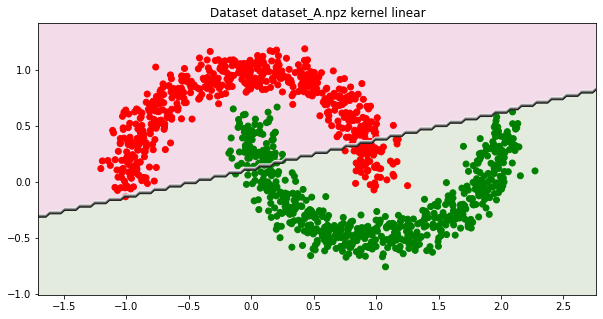

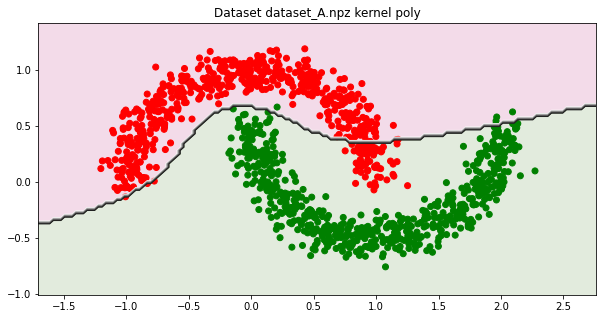

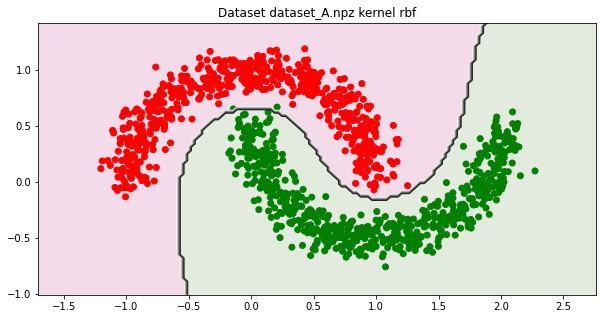

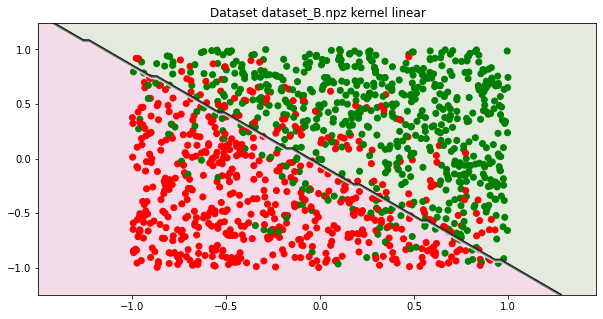

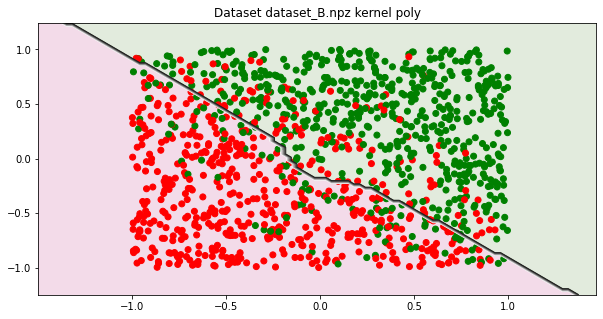

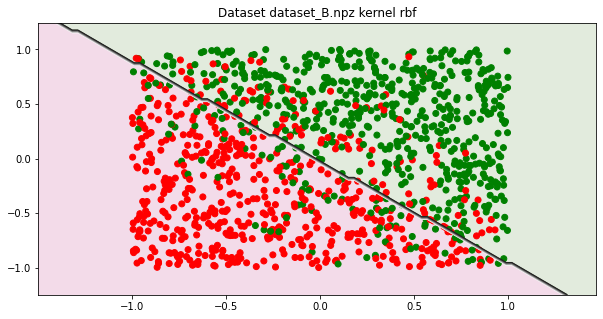

In [21]:
X_min = []
X_max = []
Y_min = []
Y_max = []
for i in range(2):
  X_min.append(X_train[i][:, 0].min()-0.5)
  X_max.append(X_train[i][:, 0].max()+0.5)
  Y_min.append(X_train[i][:, 1].min()-0.25) 
  Y_max.append(X_train[i][:, 1].max()+0.25)

aa = [0,3]
bb = [1,4]
cc = [2,5]
pr =[]

for i in range(2):
  xx, yy = np.meshgrid(np.arange(X_min[i], X_max[i], 0.03),np.arange(Y_min[i], Y_max[i], 0.03))
  for k in kernels:
    if(k == 'linear'):
      a = train_pred_svm(X_train[i], Y_train[i], kernel=k, reg_param=regs[aa[i]],kernel_param=1, num_iter_gd=100)
      pr = (test_pred_svm(np.c_[xx.ravel(), yy.ravel()],a))
      #c = test_pred_svm(X_test[i],a)
    elif(k == 'poly'):
      a = train_pred_svm(X_train[i], Y_train[i], kernel=k, reg_param=regs[bb[i]],kernel_param=mins[i], num_iter_gd=100)
      pr = (test_pred_svm(np.c_[xx.ravel(), yy.ravel()],a)) 
      #c = test_pred_svm(X_test[i],a)
    elif(k == 'rbf'):
      a = train_pred_svm(X_train[i], Y_train[i], kernel=k, reg_param=regs[cc[i]],kernel_param=minsr[i], num_iter_gd=100)
      pr = (test_pred_svm(np.c_[xx.ravel(), yy.ravel()],a))  
      #c = test_pred_svm(X_test[i],a)
    plt.figure(figsize=(10,5))
    plt.contourf(xx, yy, pr.reshape(xx.shape),alpha=0.15,cmap="PiYG")
    plt.contour(xx, yy, pr.reshape(xx.shape),alpha=1,cmap=plt.cm.binary,linewidths=1)
    y = plt.scatter(X_train[i].T[0],X_train[i].T[1],color=['red' if Y_train[i][j]==-1 else 'green' for j in range(len(Y_train[i]))])
    #plt.scatter(X_train_b.T[0],X_train_b.T[1],c=Y_train_b,cmap="brg")
    plt.title("Dataset {} kernel {}".format(l[i],k))
    plt.show()  

